## Final Project Submission

Please fill out:
* Student name: Andrew Sagwe
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Antony Muiko
* Blog post URL:


In [607]:
# Your code here - remember to use markdown cells for comments as well!

OVERVIEW


In [655]:
#The exploratory data analysis aims to identify successful movie genres and trends to provide actionable recommendations for a new movie studio, enhancing box office success

DATA UNDERSTANDING

In [608]:
 #importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split

In [609]:
db_path  = r'C:\Users\nyaki\OneDrive\Documents\Moringa_labs\phase_2_projects\dsc-phase-2-project-v3\zippedData\im.db'
conn = sqlite3.connect(db_path)

In [610]:
#listing the tables in the database
pd.read_sql("""
SELECT *
FROM sqlite_master
WHERE type = 'table'
;
""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


READ THE CSV FILE


In [611]:
movie_gross_path = r"C:\Users\nyaki\OneDrive\Documents\Moringa_labs\phase_2_projects\dsc-phase-2-project-v3\zippedData\bom.movie_gross.csv.gz"
movie_gross_df = pd.read_csv(movie_gross_path)
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [612]:
#calling the movie basics collumn
movie_basics_df = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)

In [613]:
#calling the movie ratings collumn
movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)

EXPLORING THE DATA

In [614]:
pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [615]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


EXPLORING THE CSV DATA


In [616]:
# summary info
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [617]:
movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [618]:
movie_gross_df.shape

(3387, 5)

In [619]:
movie_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [620]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


DATA CLEANING

#BOM CSV

In [621]:
#Handling missing values
df = pd.read_csv(r'C:\Users\nyaki\OneDrive\Documents\Moringa_labs\phase_2_projects\dsc-phase-2-project-v3\zippedData\bom.movie_gross.csv.gz')

#check for missing values
missing_values = df.isnull().sum()
print('Missing values per collumn:')
print(missing_values)

Missing values per collumn:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [622]:
#Filling the row studio missing values
movie_gross_df['studio'].fillna('unknown' , inplace = True)

In [623]:
#Filling the row domestic_gross with median
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].median())

In [624]:
#cheking for missing values
movie_gross_df.isnull().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [625]:

# Clean 'foreign_gross' column: remove commas and convert to float
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)
#filling missing values with median
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].median())

In [626]:
#checking for missing values
movie_gross_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [627]:
movie_gross_df.isnull().sum()


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [628]:
movie_gross_df['foreign_gross'].isnull().sum()

0

CHECKING FOR DUPLICATES


In [629]:
# Identify duplicates
duplicate_rows = df[df.duplicated()]

# Remove duplicates
df_no_duplicates = df.drop_duplicates()

print(duplicate_rows)

Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []


In [630]:
# Remove duplicates
drop_duplicates = df.drop_duplicates()


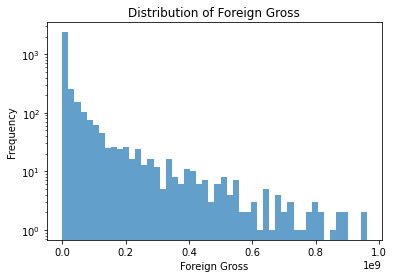

count    3.387000e+03
mean     5.248329e+07
std      1.100461e+08
min      6.000000e+02
25%      1.160000e+07
50%      1.870000e+07
75%      2.915000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64


In [631]:
#plot distribution for foreign gross

plt.hist(movie_gross_df['foreign_gross'].dropna(), bins = 50,  alpha = 0.7)
plt.title('Distribution of Foreign Gross')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.yscale('log')
# Show plot
plt.show()
print(movie_gross_df['foreign_gross'].describe())

DATA CLEANING SQL
#Exploring ratings data

In [632]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [633]:
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [634]:
movie_ratings_df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [635]:
movie_ratings_df.shape

(73856, 3)

In [636]:
movie_ratings_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [637]:
movie_ratings_df_duplicates = movie_ratings_df.duplicated().sum()
movie_ratings_df_duplicates


0

EXPLORING THE MOVIE BASICS DATA

In [638]:

movie_basics_df.info


<bound method DataFrame.info of          movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad

In [639]:
movie_basics_df.shape

(146144, 6)

In [640]:
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [641]:
#checking for duplicates
movie_basics_df_duplicates = movie_basics_df.duplicated().sum()
movie_basics_df_duplicates
print(movie_basics_df_duplicates)

0


In [642]:
(movie_basics_df.isnull().sum()/len(movie_basics_df))*100

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [643]:
#dropping values
movie_basics_df = movie_basics_df.dropna(subset=['original_title', 'genres'])

In [644]:
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    28502
genres                 0
dtype: int64

In [645]:
#Filling the row runtime_minutes with median
movie_basics_df['runtime_minutes'] = movie_basics_df['runtime_minutes'].fillna(movie_basics_df['runtime_minutes'].median())

<ipython-input-645-f89e4d4c830d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_basics_df['runtime_minutes'] = movie_basics_df['runtime_minutes'].fillna(movie_basics_df['runtime_minutes'].median())


In [646]:
(movie_basics_df.isnull().sum()/len(movie_basics_df))*100

movie_id           0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
dtype: float64

In [647]:
movie_basics_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [648]:
movie_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [649]:
movie_ratings_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [650]:
#Merge movie_ratings_df with movie_basics_df on 'movie_id'
merged_df = pd.merge(movie_ratings_df, movie_basics_df, on = 'movie_id', how='inner')
merged_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73047,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73048,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73049,tt9851050,4.7,14,Sisters,Sisters,2019,87.0,"Action,Drama"
73050,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [651]:
#Merge movie_ratings_df with movie_gross_df on 'movie_id'
final_merged_df = pd.merge(merged_df, movie_gross_df, left_on='primary_title', right_on='title', how='inner')
final_merged_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000.0,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000.0,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,Shout!,1400000.0,3400000.0,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000.0,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",The Dead Lands,Magn.,5200.0,18700000.0,2015
3016,tt3616916,6.7,28167,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",The Wave,Magn.,177000.0,18700000.0,2016
3017,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Hitchcock/Truffaut,Cohen,260000.0,18700000.0,2015
3018,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Boy Erased,Focus,6800000.0,5000000.0,2018


In [652]:
final_merged_df.drop(columns = ['primary_title' , 'original_title'], inplace = True)

In [653]:
#save cleaned dataframe
movie_gross_df.to_csv('cleaned_movie_gross_df', index=False)
movie_basics_df.to_csv('cleaned_movie_basics_df', index=False)
movie_ratings_df.to_csv('cleaned_movie_ratings_df', index=False)
final_merged_df.to_csv('cleaned_final_merged_df', index=False)